In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## loading spacy to use sentiment analysis

In [ ]:
!pip install spacy==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.7
    Uninstalling pydantic-1.10.7:
      Successfully uninstalled pydantic-1.10.7
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.3
    Uninstalling spacy-3.5.3:
      Successfully uninstalled spacy-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [ ]:
import spacy

In [ ]:
spacy.__version__

'3.4.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Installing the sentiments counter  from Github

In [ ]:

#!python -m spacy download en_core_web_sm
!pip install git+https://github.com/medianeuroscience/emfdscore.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/medianeuroscience/emfdscore.git to /tmp/pip-req-build-689icpta
  Running command git clone --filter=blob:none --quiet https://github.com/medianeuroscience/emfdscore.git /tmp/pip-req-build-689icpta
  Resolved https://github.com/medianeuroscience/emfdscore.git to commit 64dfaea0cdb00f11921dc6278d46201d73128a80
  Preparing metadata (setup.py) ... done


## Loading my data

In [ ]:
!gdown --id 1N0U-i4PxT_DmTru0r7T5po-9f9cwGgB8 -O RedditComments2.csv
!gdown --id 1dlV7huXQfim8brL7LIBy-M2kFR63P2Oh -O Reddit_metadata2.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1N0U-i4PxT_DmTru0r7T5po-9f9cwGgB8
To: /content/RedditComments2.csv
100% 4.30M/4.30M [00:00<00:00, 252MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dlV7huXQfim8brL7LIBy-M2kFR63P2Oh
To: /content/Reddit_metadata2.csv
100% 15.3k/15.3k [00:00<00:00, 31.8MB/s]


In [ ]:
df_comments= pd.read_csv("RedditComments2.csv")
df_meta = pd.read_csv("Reddit_metadata2.csv")
df_comments.drop_duplicates(inplace= True)
df_comments.dropna(inplace=True)
df_meta.drop_duplicates(inplace= True)
df_meta.dropna(inplace=True)
df_comments.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,comment_link_id,comment_important_words
0,0,gk54wx6,t3_l2d2ba,I have an adult brother with Down Syndrome who...,t3_l2d2ba,"['adult', 'brother', 'syndrom', 'live', 'indep..."
1,1,gk4u2ho,t3_l2d2ba,>am I just overthinking the entire situation?\...,t3_l2d2ba,"['overthink', 'entir', 'situat', 'think', '99'..."
2,2,gk5281a,t3_l2d2ba,I mentored an adult with Down Syndrome. He sp...,t3_l2d2ba,"['mentor', 'adult', 'syndrom', 'spoke', 'well'..."
3,3,gk4nwfl,t3_l2d2ba,"No harm in checking, he could have been practi...",t3_l2d2ba,"['harm', 'check', 'could', 'practic', 'crane',..."
4,4,gk4ovgd,t3_l2d2ba,"Be a good'un and go ask him, it's only fair be...",t3_l2d2ba,"['good', 'un', 'go', 'ask', 'fair', 'may', 'ac..."


In [ ]:
len(df_comments)

4699

## Since the models takes data frames with not headers, one is saved to be process

In [ ]:
path = "/content/drive/MyDrive/den_yelp_notebooks/comments_only.csv"
df_text_noHeaders = pd.read_csv(path,  header=None)
df_text_noHeaders.isna().sum()

0    0
dtype: int64

## Variables to use for plotting

In [ ]:
foundations = ['care','harm','fairness','cheating','loyalty','betrayal','authority','subversion','sanctity','degradation']
virtues = ['care','fairness','loyalty','authority','sanctity']
vices = ['harm','cheating','betrayal','subversion','degradation']
base_f = ['care_p','fairness_p','loyalty_p','authority_p','sanctity_p']
sents = ['care_sent','fairness_sent','loyalty_sent','authority_sent','sanctity_sent']

The following code implements the calculations needed to obtain the vices and virtues values according to eMTF. https://blog.gdeltproject.org/wp-content/uploads/emfd_gdelt.pdf

In [ ]:
def vice_virtue(df):
    
    df['care_prod'] = df['care_p'] * df['care_sent']
    df['fair_prod'] = df['fairness_p'] * df['fairness_sent']
    df['loy_prod'] = df['loyalty_p'] * df['loyalty_sent']
    df['auth_prod'] = df['authority_p'] * df['authority_sent']
    df['sanct_prod'] = df['sanctity_p'] * df['sanctity_sent']
    
    for f in foundations:
        df[f] = 0.0
        
    for i,row in df.iterrows():
        if row['care_prod'] < 0:
            df.at[i, 'harm'] = np.abs(row['care_prod'])
        else:
            df.at[i, 'care'] = np.abs(row['care_prod'])
        if row['fair_prod'] < 0:
            df.at[i, 'cheating'] = np.abs(row['fair_prod'])
        else:
            df.at[i, 'fairness'] = np.abs(row['fair_prod'])
        if row['loy_prod'] < 0:
            df.at[i, 'betrayal'] = np.abs(row['loy_prod'])
        else:
            df.at[i, 'loyalty'] = np.abs(row['loy_prod'])
        if row['auth_prod'] < 0:
            df.at[i, 'subversion'] = np.abs(row['auth_prod'])
        else:
            df.at[i, 'authority'] = np.abs(row['auth_prod'])
        if row['sanct_prod'] < 0:
            df.at[i, 'degradation'] = np.abs(row['sanct_prod'])
        else:
            df.at[i, 'sanctity'] = np.abs(row['sanct_prod'])
    return df

In [ ]:
from emfdscore.scoring import score_docs 


num_docs = len(df_text_noHeaders)

DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'sentiment'
OUT_CSV_PATH = 'all-sent.csv'

df = score_docs(df_text_noHeaders,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)
df.to_csv(OUT_CSV_PATH, index=False)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
Processed: 4699 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:42 Time:  0:00:42


In [ ]:
df.head()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var
0,0.108784,0.110082,0.090744,0.070938,0.088436,0.010395,0.018267,0.046481,0.067475,0.045324,2.037037,0.000263,0.000536
1,0.102584,0.115751,0.108894,0.089173,0.097434,-0.081524,0.061144,0.041118,-0.020148,0.024552,1.350000,0.000105,0.003239
2,0.107129,0.128778,0.103088,0.092470,0.087411,-0.019964,0.025077,0.032671,-0.032442,0.021300,1.500000,0.000258,0.000865
3,0.133110,0.106383,0.106349,0.090224,0.091799,-0.215034,-0.057929,-0.078671,-0.128706,-0.126556,1.375000,0.000296,0.003675
4,0.101967,0.124017,0.087290,0.083687,0.089140,-0.053993,0.041378,-0.010367,0.024725,-0.107404,2.250000,0.000272,0.003662


In [ ]:
#normalizing
for f in base_f:
    df[f] = (df[f] - df[f].mean()) / df[f].std()

In [ ]:
df_ = vice_virtue(df)
df_.head()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,...,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,sanctity,degradation
0,0.142529,0.126043,0.020625,-0.476763,0.021659,0.010395,0.018267,0.046481,0.067475,0.045324,...,0.001482,0.000000,0.002302,0.00000,0.000959,0.000000,0.0,0.032170,0.000982,0.000000
1,-0.001371,0.257850,0.562771,0.069748,0.257370,-0.081524,0.061144,0.041118,-0.020148,0.024552,...,0.000112,0.000000,0.015766,0.00000,0.023140,0.000000,0.0,0.001405,0.006319,0.000000
2,0.104112,0.560711,0.389336,0.168533,-0.005188,-0.019964,0.025077,0.032671,-0.032442,0.021300,...,0.000000,0.002079,0.014061,0.00000,0.012720,0.000000,0.0,0.005468,0.000000,0.000110
3,0.707075,0.040055,0.486761,0.101249,0.109776,-0.215034,-0.057929,-0.078671,-0.128706,-0.126556,...,0.000000,0.152045,0.000000,0.00232,0.000000,0.038294,0.0,0.013031,0.000000,0.013893
4,-0.015690,0.450031,-0.082545,-0.094671,0.040108,-0.053993,0.041378,-0.010367,0.024725,-0.107404,...,0.000847,0.000000,0.018621,0.00000,0.000856,0.000000,0.0,0.002341,0.000000,0.004308


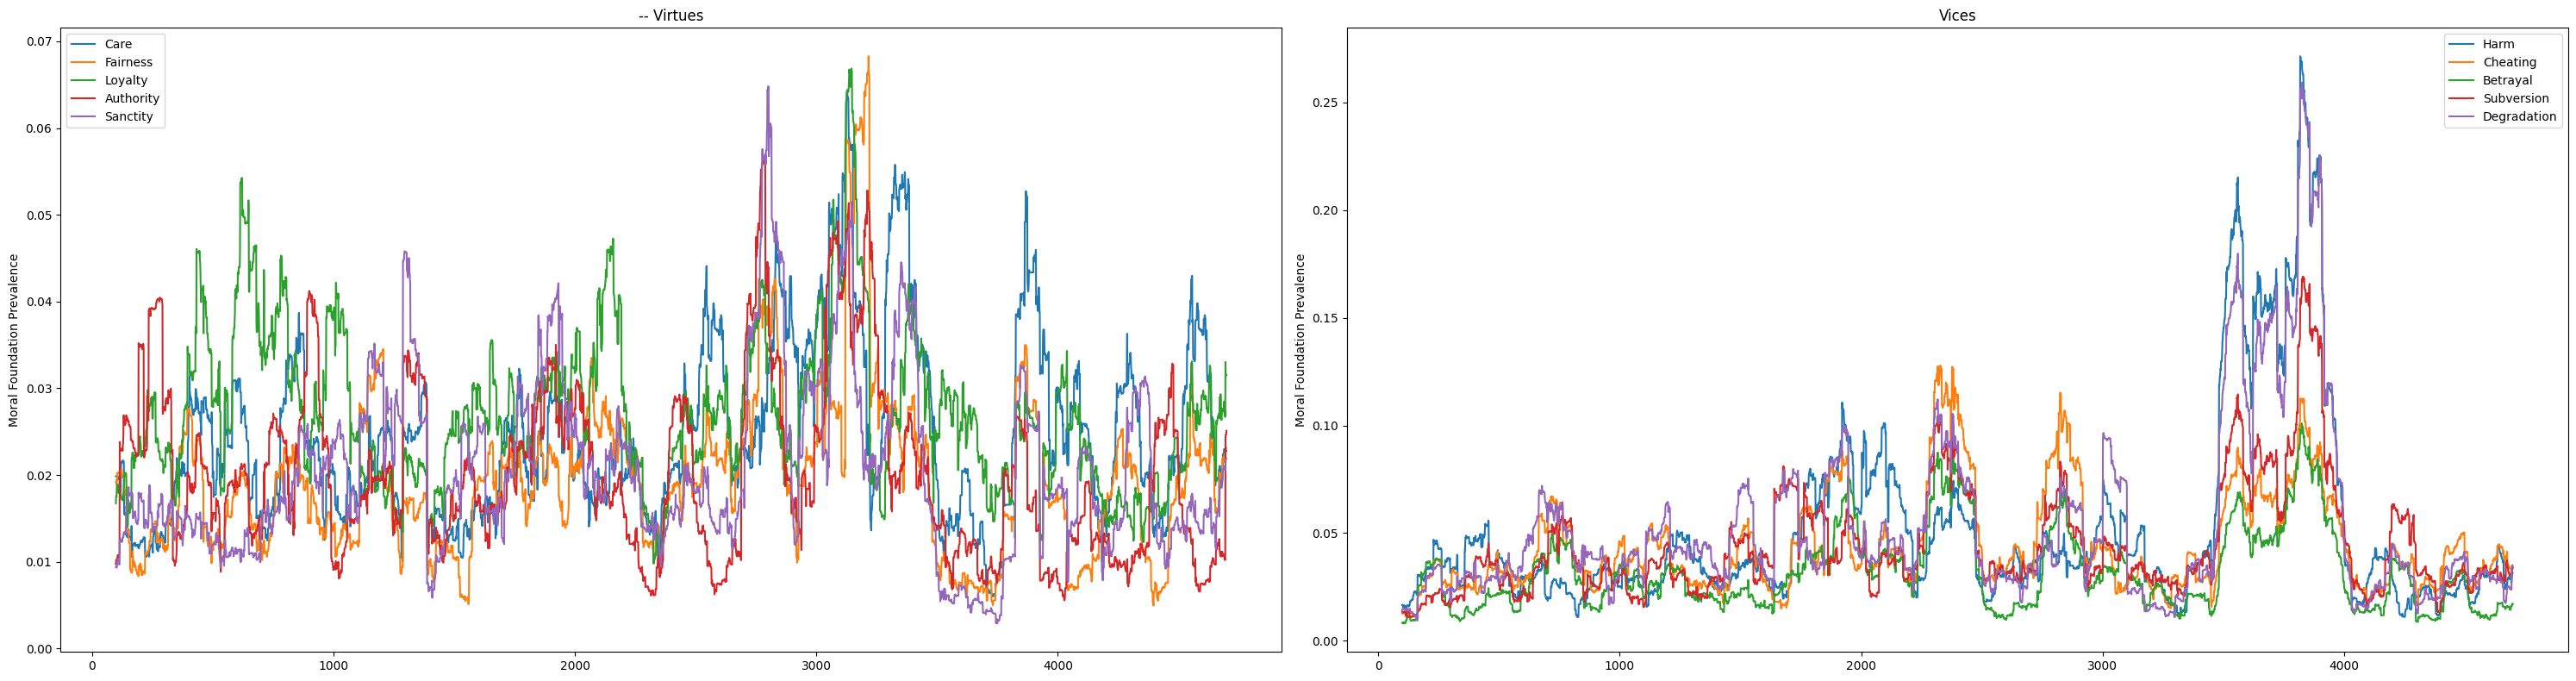

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,8))

df_[virtues].rolling(100).mean().plot(ax=ax[0])
#df.despine(offset=10)
ax[0].legend(loc='upper left', labels=['Care','Fairness','Loyalty','Authority','Sanctity'])
ax[0].set_title("-- Virtues")
ax[0].set_ylabel('Moral Foundation Prevalence')


df_[vices].rolling(100).mean().plot(ax=ax[1])
#df.despine(offset=10)
ax[1].legend(loc='upper right', labels=['Harm','Cheating','Betrayal','Subversion','Degradation'])
ax[1].set_title("Vices")

plt.ylabel('Moral Foundation Prevalence')
plt.tight_layout()
plt.show()

In [ ]:
np.log(df_[virtues])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,care,fairness,loyalty,authority,sanctity
0,-6.514668,-6.073767,-6.949977,-inf,-6.926226
1,-9.098798,-4.149894,-3.766183,-inf,-5.064195
2,-inf,-4.264370,-4.364592,-inf,-inf
3,-inf,-inf,-inf,-inf,-inf
4,-7.073618,-3.983453,-7.063541,-inf,-inf
...,...,...,...,...,...
4694,-inf,-3.376617,-0.458121,0.343456,-inf
4695,-inf,-2.558332,-3.876716,-3.088723,-2.010647
4696,-inf,-4.109474,-inf,-inf,-inf
4697,-4.080751,-inf,-5.322462,-6.283176,-inf


In [ ]:
np.log(df_[vices])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,harm,cheating,betrayal,subversion,degradation
0,-inf,-inf,-inf,-3.436735,-inf
1,-inf,-inf,-inf,-6.567521,-inf
2,-6.176101,-inf,-inf,-5.208920,-9.110558
3,-1.883576,-6.066055,-3.262457,-4.340394,-4.276387
4,-inf,-inf,-inf,-6.057302,-5.447346
...,...,...,...,...,...
4694,-1.482815,-inf,-inf,-inf,0.120156
4695,-2.648901,-inf,-inf,-inf,-inf
4696,-1.553373,-inf,-2.317564,-1.379899,-3.015935
4697,-inf,-2.687432,-inf,-inf,-5.162912


In [ ]:
df_text_noHeaders.iloc[0].values

array(["I have an adult brother with Down Syndrome who lives independently in an apartment with staff who assist him. Intellectual disability ranges vastly in adults with Downs and it's impossible to know whether or not he knew the value of the money he handed you. I would 100% double check to make sure that he realized how much he handed you. Individuals with Downs are often very kind and it's possible he knew it would make you happy but didn't realize the repurcussions of his kindness. i.e. Not having grocery money or money for that cool day trip he has planned for the week with his family or care providers. My brother has done similar things like this before without fully understanding what he is doing (he typically struggles with math as well) despite him being considered very high functioning.\n\nTLDR; Double check with the individual, it's impossible to know if he realized what he was doing. If he did; awesome for you. If not; you may have ensured that he has food this week.\n\nE

In [ ]:
!curl -X GET \
     "https://datasets-server.huggingface.co/splits?dataset=USC-MOLA-Lab%2FMFRC"

{"splits":[{"dataset":"USC-MOLA-Lab/MFRC","config":"USC-MOLA-Lab--MFRC","split":"train"}],"pending":[],"failed":[]}

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("USC-MOLA-Lab/MFRC")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/USC-MOLA-Lab___csv/USC-MOLA-Lab--MFRC-d880200ad192d2ed/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'subreddit', 'bucket', 'annotator', 'annotation', 'confidence'],
        num_rows: 61226
    })
})

In [ ]:
df_anno = pd.DataFrame(dataset["train"])
df_anno.head()

,text,subreddit,bucket,annotator,annotation,confidence
0,That particular part of the debate is especial...,europe,French politics,annotator03,Non-Moral,Confident
1,That particular part of the debate is especial...,europe,French politics,annotator01,Purity,Confident
2,That particular part of the debate is especial...,europe,French politics,annotator02,Thin Morality,Confident
3,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator03,Non-Moral,Confident
4,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator00,Non-Moral,Somewhat Confident


In [ ]:
len(df_anno)

61226

In [ ]:
unwanted_annot = ["Non-Moral","Thin Morality"]
idx = np.where(df_anno["annotation"] =="Non-Moral")
idx_ = np.where(df_anno["annotation"] =="Thin Morality")
print(idx[0], idx_[0])

(array([    0,     3,     4, ..., 61207, 61213, 61224]),) [    0     3     4 ... 61207 61213 61224] [    2     7    10 ... 61219 61222 61223]


In [ ]:
df_anno.drop(index=idx[0], inplace= True)
df_anno.drop(index=idx_[0], inplace= True)
df_anno.head()

,text,subreddit,bucket,annotator,annotation,confidence
1,That particular part of the debate is especial...,europe,French politics,annotator01,Purity,Confident
8,TBH Marion Le Pen would be better. Closet fasc...,neoliberal,French politics,annotator02,Equality,Somewhat Confident
12,The Le Pen brand of conservatism and classical...,europe,French politics,annotator03,Authority,Somewhat Confident
21,"Hey, fuck you. Us leftists will never support ...",worldnews,French politics,annotator03,"Loyalty,Equality",Confident
22,"Hey, fuck you. Us leftists will never support ...",worldnews,French politics,annotator04,Purity,Confident


In [ ]:
df_anno.drop_duplicates(inplace = True)

In [105]:
df_annotated_final = df_anno.sample(n=5000, random_state=1)
df_annotated_final

,text,subreddit,bucket,annotator,annotation,confidence
21054,MLP doesn't need to wait for a referendum to b...,europe,French politics,annotator00,Authority,Not Confident
926,Or - or - assclowns like Le Pen and Farage cou...,worldnews,French politics,annotator02,Equality,Confident
12031,Congratulations on your victory Macron voters....,worldnews,French politics,annotator00,Care,Not Confident
9734,The German Constitution did not let Hitler bec...,neoliberal,French politics,annotator02,Equality,Somewhat Confident
44232,So Republicans really are for liberal policies...,politics,US Politics,annotator03,Equality,Confident
...,...,...,...,...,...,...
9959,Le Pen wants to promote hatred of Islam and th...,worldnews,French politics,annotator04,"Care,Purity,Equality,Proportionality",Confident
48255,Worse. People’s children. Literally the most i...,Conservative,US Politics,annotator02,Care,Confident
16657,"man Merkel, Obama and Macron are all globalist...",worldnews,French politics,annotator01,Care,Confident
383,I think they believed Le Pen to be a superhero...,europe,French politics,annotator01,Authority,Confident


In [107]:
df_annotated_final["annotation"].value_counts()

Care                                  973
Authority                             815
Equality                              620
Proportionality                       473
Loyalty                               306
                                     ... 
Purity,Authority,Equality               1
Care,Equality,Purity                    1
Care,Equality,Loyalty                   1
Loyalty,Equality,Proportionality        1
Proportionality,Equality,Authority      1
Name: annotation, Length: 96, dtype: int64

In [106]:
df_annotated_final.to_csv("/content/drive/MyDrive/den_yelp_notebooks/reddit_annoted.csv", index=False)

In [ ]:
%matplotlib inline
import json
from nltk.stem.snowball import SnowballStemmer
import os
import re